In [1]:
import numpy as np
import math

In [2]:
np.random.randn(4)

array([ 0.31024857,  0.18542635, -0.20541394,  1.09428058])

In [3]:
np.random.normal(size=4)

array([-1.67724125,  0.60552654,  1.67522798, -1.35944502])

In [4]:
np.random.standard_normal(4)

array([-0.16066608,  0.14522329, -0.02663936,  0.9173325 ])

In [5]:
t=np.arange(10).reshape(2,5)
print(t.dtype)
print(len(t))

int32
2


In [6]:
t

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [7]:
%timeit -n 100 np.arange(10000)**2

17.5 µs ± 1.69 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
c=np.array([1,2,3],dtype=float)
c

array([1., 2., 3.])

In [9]:
np.exp(1j*np.linspace(0,2*np.pi,8, endpoint=False))

array([ 1.00000000e+00+0.00000000e+00j,  7.07106781e-01+7.07106781e-01j,
        6.12323400e-17+1.00000000e+00j, -7.07106781e-01+7.07106781e-01j,
       -1.00000000e+00+1.22464680e-16j, -7.07106781e-01-7.07106781e-01j,
       -1.83697020e-16-1.00000000e+00j,  7.07106781e-01-7.07106781e-01j])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

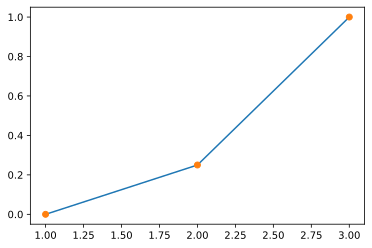

In [11]:
x=[1,2,3]
y=[0,0.25,1]
_=plt.plot(x,y)
_=plt.plot(x,y,'o')

In [12]:
m=np.random.randint(1,7,(3,3))
n=np.random.randint(1,7,(3,3))

In [13]:
print(m)
print(n)
m*n

[[5 1 2]
 [4 6 6]
 [5 4 2]]
[[2 2 4]
 [4 4 6]
 [3 3 4]]


array([[10,  2,  8],
       [16, 24, 36],
       [15, 12,  8]])

In [14]:
m.dot(n)

array([[20, 20, 34],
       [50, 50, 76],
       [32, 32, 52]])

In [15]:
m>n

array([[ True, False, False],
       [False,  True, False],
       [ True,  True, False]])

In [16]:
m2=m.copy()
m2[m2>n]=0
m2

array([[0, 1, 2],
       [4, 0, 6],
       [0, 0, 2]])

In [17]:
m3=m.copy()
np.array_equal(m,m3)

True

In [18]:
s=m.copy()
s+=s.copy().T
s

array([[10,  5,  7],
       [ 5, 12, 10],
       [ 7, 10,  4]])

In [19]:
np.sum(m)

35

In [20]:
np.sum(m, axis=0)

array([14, 11, 10])

In [21]:
m

array([[5, 1, 2],
       [4, 6, 6],
       [5, 4, 2]])

In [22]:
m.min(axis=0)

array([4, 1, 2])

In [23]:
m.argmin(axis=0)

array([1, 0, 0], dtype=int64)

In [24]:
m.std(axis=0)

array([0.47140452, 2.05480467, 1.88561808])

In [25]:
m.mean(axis=0)

array([4.66666667, 3.66666667, 3.33333333])

In [26]:
np.median(m,axis=0)

array([5., 4., 2.])

In [27]:
a=np.arange(0,40,10)
print(a)
print(a.shape)

[ 0 10 20 30]
(4,)


In [28]:
a=a[:, np.newaxis]
print(a)
print(a.shape)

[[ 0]
 [10]
 [20]
 [30]]
(4, 1)


In [29]:
np.arange(0,40,10).reshape((4,1))

array([[ 0],
       [10],
       [20],
       [30]])

In [30]:
b=np.array([1,2,3])
a+b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [31]:
m.ravel()

array([5, 1, 2, 4, 6, 6, 5, 4, 2])

In [32]:
m.flatten()

array([5, 1, 2, 4, 6, 6, 5, 4, 2])

In [33]:
m.ravel()[m.ravel()==1]=-1

In [34]:
m

array([[ 5, -1,  2],
       [ 4,  6,  6],
       [ 5,  4,  2]])

In [35]:
z=np.array([1,2,3])
print(z)
print(z[:, np.newaxis])
print(z[np.newaxis, :])

[1 2 3]
[[1]
 [2]
 [3]]
[[1 2 3]]


In [36]:
X=np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

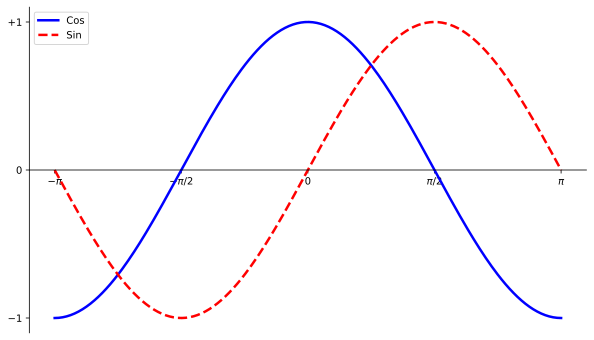

In [37]:
plt.figure(figsize=(10,6),dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle='-', label="Cos")
plt.plot(X, S, color="red", linewidth=2.5, linestyle='--', label="Sin")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$'])
plt.yticks([-1,0,1],[r'$-1$',r'$0$',r'$+1$'])
ax=plt.gca()    # Get Current Axis
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data',0))
plt.legend(loc="upper left")

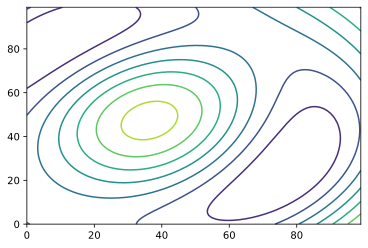

In [38]:
points = np.linspace(-np.pi, np.pi, 100)
xs, ys = np.meshgrid(points, points)
z=0
for i in range(3):
    dx,dy=np.random.randn(),np.random.randn()
    z1 = np.cos(np.sqrt((xs+dx) ** 2 + (ys+dy) ** 2))
    z+=z1
plt.contour(z)

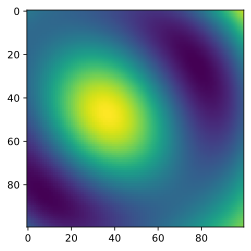

In [39]:
plt.imshow(z)

In [40]:
# Add example of 3D plot